## Import libraries and read in .csv file

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from IPython.display import display

%matplotlib inline

data = pd.read_csv('Weekly_counts_of_death_by_jurisdiction_and_cause_of_death.csv', low_memory=False)
data.head()

,Jurisdiction,Week Ending Date,State Abbreviation,Year,Week,Cause Group,Number of Deaths,Cause Subgroup,Time Period,Suppress,Note,Average Number of Deaths in Time Period,Difference from 2015-2019 to 2020,Percent Difference from 2015-2019 to 2020,Type
0,Alabama,2015-01-10,AL,2015,1,Alzheimer disease and dementia,120.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted)
1,Alabama,2015-01-10,AL,2015,1,Alzheimer disease and dementia,120.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Unweighted
2,Alabama,2016-01-09,AL,2016,1,Alzheimer disease and dementia,76.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted)
3,Alabama,2016-01-09,AL,2016,1,Alzheimer disease and dementia,76.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Unweighted
4,Alabama,2017-01-07,AL,2017,1,Alzheimer disease and dementia,96.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted)


## Data cleanup
### Drop uneeded columns

In [2]:
data.drop('Week Ending Date', axis = 1, inplace = True)
data.drop('Week', axis = 1, inplace = True)
data.drop('Cause Subgroup', axis = 1, inplace = True)
data.drop('Time Period', axis = 1, inplace = True)
data.drop('Suppress', axis = 1, inplace = True)
data.drop('Note', axis = 1, inplace = True)
data.drop('Average Number of Deaths in Time Period', axis = 1, inplace = True)
data.drop('Difference from 2015-2019 to 2020', axis = 1, inplace = True)
data.drop('Percent Difference from 2015-2019 to 2020', axis = 1, inplace = True)
data.drop('Type', axis = 1, inplace = True)

### Drop rows with missing values in column 'Number of Deaths'

In [3]:
display(data.isnull().sum())
data['Number of Deaths'].isnull().sum()
data = data.dropna(subset = ["Number of Deaths"])
display(data.isnull().sum())

Jurisdiction           0
State Abbreviation     0
Year                   0
Cause Group            0
Number of Deaths      34
dtype: int64

Jurisdiction          0
State Abbreviation    0
Year                  0
Cause Group           0
Number of Deaths      0
dtype: int64

In [4]:
data.head()

,Jurisdiction,State Abbreviation,Year,Cause Group,Number of Deaths
0,Alabama,AL,2015,Alzheimer disease and dementia,120.0
1,Alabama,AL,2015,Alzheimer disease and dementia,120.0
2,Alabama,AL,2016,Alzheimer disease and dementia,76.0
3,Alabama,AL,2016,Alzheimer disease and dementia,76.0
4,Alabama,AL,2017,Alzheimer disease and dementia,96.0


### Change column names

In [5]:
data.columns = ['State/territory', 'StateAbbreviation', 'Year', 'CauseGroup', 'NumberOfDeaths']

In [6]:
data.dtypes

State/territory       object
StateAbbreviation     object
Year                   int64
CauseGroup            object
NumberOfDeaths       float64
dtype: object

### Convert NumberOfDeaths from float to int

In [7]:
data = data.astype({'NumberOfDeaths':'int'})
data.dtypes

State/territory      object
StateAbbreviation    object
Year                  int64
CauseGroup           object
NumberOfDeaths        int32
dtype: object

## Data analysis
### Seperate data by year

In [8]:
df_2015 = data[data.Year == 2015].reset_index(drop = True)
df_2016 = data[data.Year == 2016].reset_index(drop = True)
df_2017 = data[data.Year == 2017].reset_index(drop = True)
df_2018 = data[data.Year == 2018].reset_index(drop = True)
df_2019 = data[data.Year == 2019].reset_index(drop = True)
df_2020 = data[data.Year == 2020].reset_index(drop = True)


### Sum total number of deaths and total number of deaths per year

In [9]:
totalDeaths_all = int(sum(data['NumberOfDeaths']))

sum_2015 = int(sum(df_2015["NumberOfDeaths"]))
sum_2016 = int(sum(df_2016["NumberOfDeaths"]))
sum_2017 = int(sum(df_2017["NumberOfDeaths"]))
sum_2018 = int(sum(df_2018["NumberOfDeaths"]))
sum_2019 = int(sum(df_2019["NumberOfDeaths"]))
sum_2020 = int(sum(df_2020["NumberOfDeaths"]))


### Create dataframe of years and deaths

,Year,Deaths,Rate
0,2015,8388330,0.16125
1,2016,8418548,0.16184
2,2017,8645986,0.16621
3,2018,8733140,0.16788
4,2019,8727262,0.16777
5,2020,9105809,0.17505


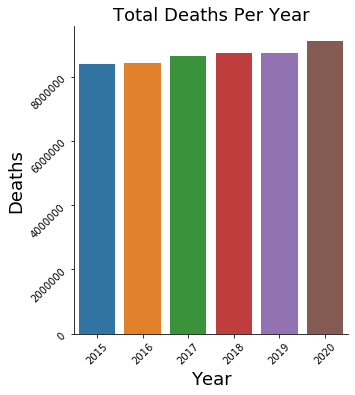

In [10]:
years = ['2015', '2016', '2017', '2018', '2019', '2020', 'Total']
deaths = [sum_2015, sum_2016, sum_2017, sum_2018, sum_2019, sum_2020, totalDeaths_all]
rate = [round(sum_2015/totalDeaths_all, 5), round(sum_2016/totalDeaths_all, 5),
        round(sum_2017/totalDeaths_all, 5), round(sum_2018/totalDeaths_all, 5),
        round(sum_2019/totalDeaths_all, 5), round(sum_2020/totalDeaths_all, 5)]

rateSum = sum(rate)
rate.append(rateSum)

df_deaths = np.array([years, deaths, rate]).T
df_deaths = df_deaths.reshape(7,3)
df_deaths = pd.DataFrame(df_deaths)
df_deaths.columns = ['Year', 'Deaths', 'Rate']

df_ndeaths = df_deaths

df_ndeaths.drop(df_ndeaths.tail(1).index,inplace=True) # drop first n rows

# convert column "a" of a DataFrame
df_ndeaths['Year'] = pd.to_numeric(df_ndeaths['Year'])
df_ndeaths['Deaths'] = pd.to_numeric(df_ndeaths['Deaths'])

display(df_ndeaths)

sns.catplot(x = 'Year', y = 'Deaths', kind = 'bar', data = df_ndeaths)
plt.title("Total Deaths Per Year", size=18)
plt.xlabel("Year", size=18)
plt.ylabel("Deaths", size=18)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


### Deaths by cause and year

,Year,Alzheimer,Malignant,Respiratory,Circulatory,Other,Total
0,2015,978278,2381810,1062942,3314302,650998,8388330
1,2016,994914,2390754,1046110,3333214,653556,8418548
2,2017,1047324,2403926,1100342,3419926,674468,8645986
3,2018,1067976,2404396,1117264,3460880,682624,8733140
4,2019,1086700,2406090,1068318,3482152,684002,8727262
5,2020,1219705,2415926,1066075,3660848,743255,9105809


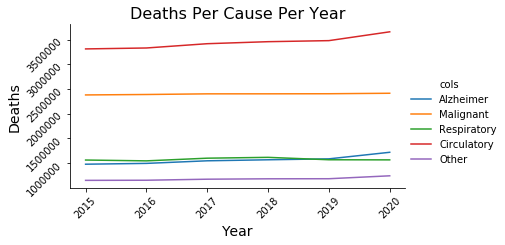

In [11]:
deathsAlzheimer_2015 = int(data.query("CauseGroup == 'Alzheimer disease and dementia' and Year == 2015")['NumberOfDeaths'].sum())
deathsMalignant_2015 = int(data.query("CauseGroup == 'Malignant neoplasms' and Year == 2015")['NumberOfDeaths'].sum())
deathsRespiratory_2015 = int(data.query("CauseGroup == 'Respiratory diseases' and Year == 2015")['NumberOfDeaths'].sum())
deathsCirculatory_2015 = int(data.query("CauseGroup == 'Circulatory diseases' and Year == 2015")['NumberOfDeaths'].sum())
deathsOther_2015 = int(data.query("CauseGroup == 'Other select causes' and Year == 2015")['NumberOfDeaths'].sum())

deathsAlzheimer_2016 = int(data.query("CauseGroup == 'Alzheimer disease and dementia' and Year == 2016")['NumberOfDeaths'].sum())
deathsMalignant_2016 = int(data.query("CauseGroup == 'Malignant neoplasms' and Year == 2016")['NumberOfDeaths'].sum())
deathsRespiratory_2016 = int(data.query("CauseGroup == 'Respiratory diseases' and Year == 2016")['NumberOfDeaths'].sum())
deathsCirculatory_2016 = int(data.query("CauseGroup == 'Circulatory diseases' and Year == 2016")['NumberOfDeaths'].sum())
deathsOther_2016 = int(data.query("CauseGroup == 'Other select causes' and Year == 2016")['NumberOfDeaths'].sum())

deathsAlzheimer_2017 = int(data.query("CauseGroup == 'Alzheimer disease and dementia' and Year == 2017")['NumberOfDeaths'].sum())
deathsMalignant_2017 = int(data.query("CauseGroup == 'Malignant neoplasms' and Year == 2017")['NumberOfDeaths'].sum())
deathsRespiratory_2017 = int(data.query("CauseGroup == 'Respiratory diseases' and Year == 2017")['NumberOfDeaths'].sum())
deathsCirculatory_2017 = int(data.query("CauseGroup == 'Circulatory diseases' and Year == 2017")['NumberOfDeaths'].sum())
deathsOther_2017 = int(data.query("CauseGroup == 'Other select causes' and Year == 2017")['NumberOfDeaths'].sum())

deathsAlzheimer_2018 = int(data.query("CauseGroup == 'Alzheimer disease and dementia' and Year == 2018")['NumberOfDeaths'].sum())
deathsMalignant_2018 = int(data.query("CauseGroup == 'Malignant neoplasms' and Year == 2018")['NumberOfDeaths'].sum())
deathsRespiratory_2018 = int(data.query("CauseGroup == 'Respiratory diseases' and Year == 2018")['NumberOfDeaths'].sum())
deathsCirculatory_2018 = int(data.query("CauseGroup == 'Circulatory diseases' and Year == 2018")['NumberOfDeaths'].sum())
deathsOther_2018 = int(data.query("CauseGroup == 'Other select causes' and Year == 2018")['NumberOfDeaths'].sum())

deathsAlzheimer_2019 = int(data.query("CauseGroup == 'Alzheimer disease and dementia' and Year == 2019")['NumberOfDeaths'].sum())
deathsMalignant_2019 = int(data.query("CauseGroup == 'Malignant neoplasms' and Year == 2019")['NumberOfDeaths'].sum())
deathsRespiratory_2019 = int(data.query("CauseGroup == 'Respiratory diseases' and Year == 2019")['NumberOfDeaths'].sum())
deathsCirculatory_2019 = int(data.query("CauseGroup == 'Circulatory diseases' and Year == 2019")['NumberOfDeaths'].sum())
deathsOther_2019 = int(data.query("CauseGroup == 'Other select causes' and Year == 2019")['NumberOfDeaths'].sum())

deathsAlzheimer_2020 = int(data.query("CauseGroup == 'Alzheimer disease and dementia' and Year == 2020")['NumberOfDeaths'].sum())
deathsMalignant_2020 = int(data.query("CauseGroup == 'Malignant neoplasms' and Year == 2020")['NumberOfDeaths'].sum())
deathsRespiratory_2020 = int(data.query("CauseGroup == 'Respiratory diseases' and Year == 2020")['NumberOfDeaths'].sum())
deathsCirculatory_2020 = int(data.query("CauseGroup == 'Circulatory diseases' and Year == 2020")['NumberOfDeaths'].sum())
deathsOther_2020 = int(data.query("CauseGroup == 'Other select causes' and Year == 2020")['NumberOfDeaths'].sum())

array_2015 = [2015, deathsAlzheimer_2015, deathsMalignant_2015, deathsRespiratory_2015, deathsCirculatory_2015, deathsOther_2015, sum_2015]
array_2016 = [2016, deathsAlzheimer_2016, deathsMalignant_2016, deathsRespiratory_2016, deathsCirculatory_2016, deathsOther_2016, sum_2016]
array_2017 = [2017, deathsAlzheimer_2017, deathsMalignant_2017, deathsRespiratory_2017, deathsCirculatory_2017, deathsOther_2017, sum_2017]
array_2018 = [2018, deathsAlzheimer_2018, deathsMalignant_2018, deathsRespiratory_2018, deathsCirculatory_2018, deathsOther_2018, sum_2018]
array_2019 = [2019, deathsAlzheimer_2019, deathsMalignant_2019, deathsRespiratory_2019, deathsCirculatory_2019, deathsOther_2019, sum_2019]
array_2020 = [2020, deathsAlzheimer_2020, deathsMalignant_2020, deathsRespiratory_2020, deathsCirculatory_2020, deathsOther_2020, sum_2020]

df_deathsCausePerYear = pd.DataFrame([array_2015, array_2016, array_2017, array_2018, array_2019, array_2020])

df_deathsCausePerYear.columns = ['Year', 'Alzheimer', 'Malignant', 'Respiratory', 'Circulatory', 'Other', 'Total']

display(df_deathsCausePerYear)

df_catPerYear = df_deathsCausePerYear.iloc[:,:-1]

df_catPerYear = df_catPerYear.melt('Year', var_name='cols', value_name='vals')

sns.relplot(x = 'Year', y = 'vals', hue = 'cols', kind = 'line', height=3, aspect=2, data = df_catPerYear)
plt.title("Deaths Per Cause Per Year", size=16)
plt.xlabel("Year", size=14)
plt.ylabel("Deaths", size=14)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


### Total deaths by cause

,Cause,Deaths,Rate
0,Circulatory,20671322,0.3974
1,Malignant,14402902,0.2769
2,Respiratory,6461051,0.1242
3,Alzheimer,6394897,0.1229
4,Other,4088903,0.0786


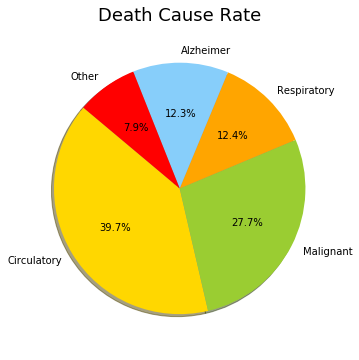

In [12]:
deaths_alzheimer = int(data.loc[data['CauseGroup'] == 'Alzheimer disease and dementia', 'NumberOfDeaths'].sum())
deaths_malignant = int(data.loc[data['CauseGroup'] == 'Malignant neoplasms', 'NumberOfDeaths'].sum())
deaths_respiratory = int(data.loc[data['CauseGroup'] == 'Respiratory diseases', 'NumberOfDeaths'].sum())
deaths_circulatory = int(data.loc[data['CauseGroup'] == 'Circulatory diseases', 'NumberOfDeaths'].sum())
deaths_other = int(data.loc[data['CauseGroup'] == 'Other select causes', 'NumberOfDeaths'].sum())

array_circulatory = ['Circulatory', deaths_circulatory, round(deaths_circulatory/totalDeaths_all, 4)]
array_malignant = ['Malignant', deaths_malignant, round(deaths_malignant/totalDeaths_all, 4)]
array_respiratory = ['Respiratory', deaths_respiratory, round(deaths_respiratory/totalDeaths_all, 4)]
array_alzheimer = ['Alzheimer', deaths_alzheimer, round(deaths_alzheimer/totalDeaths_all, 4)]
array_other = ['Other', deaths_other, round(deaths_other/totalDeaths_all, 4)]

df_cause = pd.DataFrame([array_circulatory, array_malignant, array_respiratory, array_alzheimer, array_other])

df_cause.columns = ['Cause', 'Deaths', 'Rate']

display(df_cause)

fig, ax = plt.subplots(figsize = (5, 6), subplot_kw = dict(aspect = "equal"))

labels = ['Circulatory', 'Malignant', 'Respiratory', 'Alzheimer', 'Other']
sizes = [39.74, 27.69, 12.42, 12.29, 7.86]
colors = ['gold', 'yellowgreen', 'orange', 'lightskyblue', 'red']

# Plot
plt.pie(sizes, labels = labels, colors = colors,
autopct='%1.1f%%', shadow = True, startangle=140)

plt.axis('equal')
plt.title('Death Cause Rate', size=18)
plt.show()

### Death rate by cause and year

In [13]:
rateCause_2015 = ['2015', round(deathsAlzheimer_2015/sum_2015, 4), round(deathsMalignant_2015/sum_2015, 4),
                  round(deathsRespiratory_2015/sum_2015, 4), round(deathsCirculatory_2015/sum_2015, 4),
                  round(deathsOther_2015/sum_2015, 4)]
rateCause_2016 = ['2016', round(deathsAlzheimer_2016/sum_2016, 4), round(deathsMalignant_2016/sum_2016, 4),
                  round(deathsRespiratory_2016/sum_2016, 4), round(deathsCirculatory_2016/sum_2016, 4),
                  round(deathsOther_2016/sum_2016, 4)]
rateCause_2017 = ['2017', round(deathsAlzheimer_2017/sum_2017, 4), round(deathsMalignant_2017/sum_2017, 4),
                  round(deathsRespiratory_2017/sum_2017, 4), round(deathsCirculatory_2017/sum_2017, 4),
                  round(deathsOther_2017/sum_2017, 4)]
rateCause_2018 = ['2018', round(deathsAlzheimer_2018/sum_2018, 4), round(deathsMalignant_2018/sum_2018, 4),
                  round(deathsRespiratory_2018/sum_2018, 4), round(deathsCirculatory_2018/sum_2018, 4),
                  round(deathsOther_2018/sum_2018, 4)]
rateCause_2019 = ['2019', round(deathsAlzheimer_2019/sum_2019, 4), round(deathsMalignant_2019/sum_2019, 4),
                  round(deathsRespiratory_2019/sum_2019, 4), round(deathsCirculatory_2019/sum_2019, 4),
                  round(deathsOther_2019/sum_2019, 4)]
rateCause_2020 = ['2020', round(deathsAlzheimer_2020/sum_2020, 4), round(deathsMalignant_2020/sum_2020, 4),
                  round(deathsRespiratory_2020/sum_2020, 4), round(deathsCirculatory_2020/sum_2020, 4),
                  round(deathsOther_2020/sum_2020, 4)]

df_rateCause = pd.DataFrame([rateCause_2015, rateCause_2016, rateCause_2017, rateCause_2018, rateCause_2019, rateCause_2020])
df_rateCause.columns = ['Year', 'Alzheimer', 'Malignant', 'Respiratory', 'Circulatory', 'Other']

display(df_rateCause)


,Year,Alzheimer,Malignant,Respiratory,Circulatory,Other
0,2015,0.1166,0.2839,0.1267,0.3951,0.0776
1,2016,0.1182,0.2840,0.1243,0.3959,0.0776
2,2017,0.1211,0.2780,0.1273,0.3956,0.0780
3,2018,0.1223,0.2753,0.1279,0.3963,0.0782
4,2019,0.1245,0.2757,0.1224,0.3990,0.0784
5,2020,0.1339,0.2653,0.1171,0.4020,0.0816


### Death trends per cause

,Circulatory
Year,
2015,3314302
2016,3333214
2017,3419926
2018,3460880
2019,3482152
2020,3660848


D:\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = op(self.values, np.asarray(other))


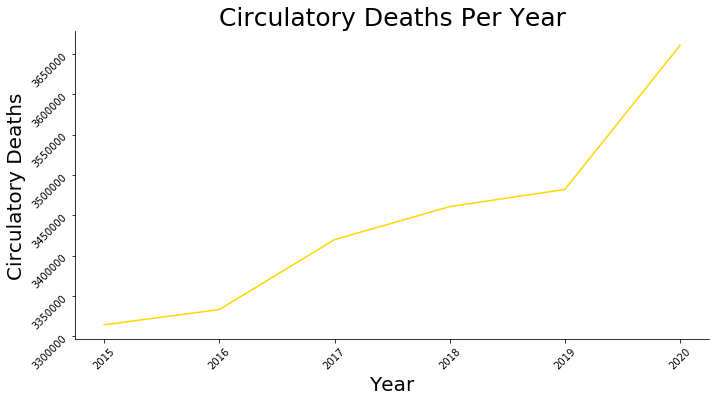

,Malignant
Year,
2015,2381810
2016,2390754
2017,2403926
2018,2404396
2019,2406090
2020,2415926


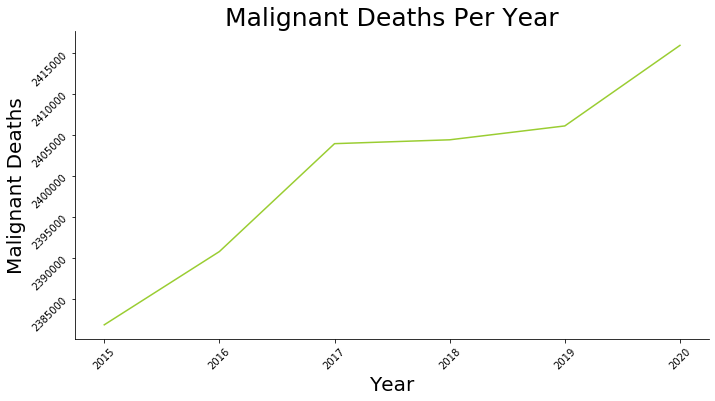

,Respiratory
Year,
2015,1062942
2016,1046110
2017,1100342
2018,1117264
2019,1068318
2020,1066075


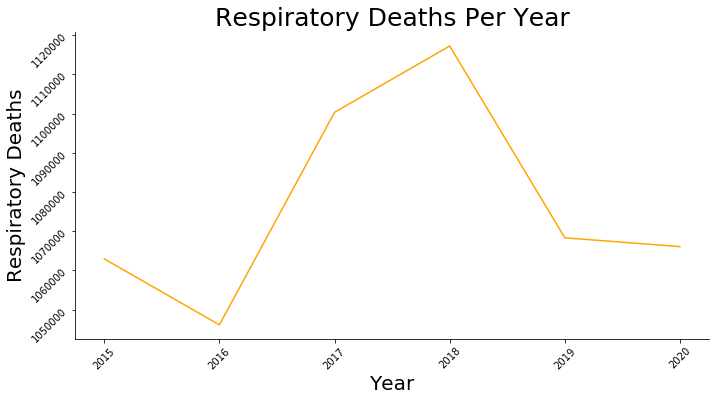

,Alzheimer
Year,
2015,978278
2016,994914
2017,1047324
2018,1067976
2019,1086700
2020,1219705


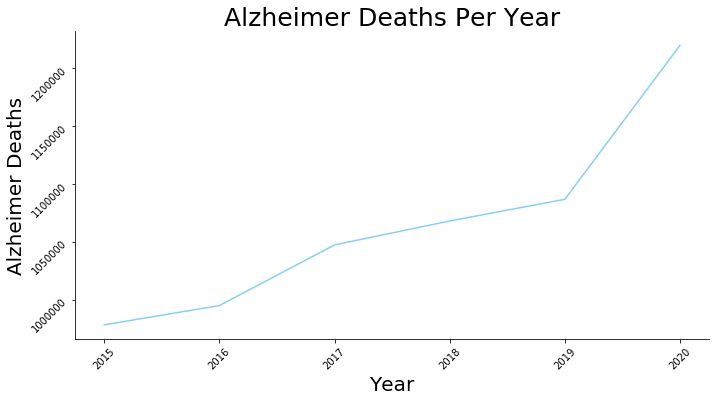

,Other
Year,
2015,650998
2016,653556
2017,674468
2018,682624
2019,684002
2020,743255


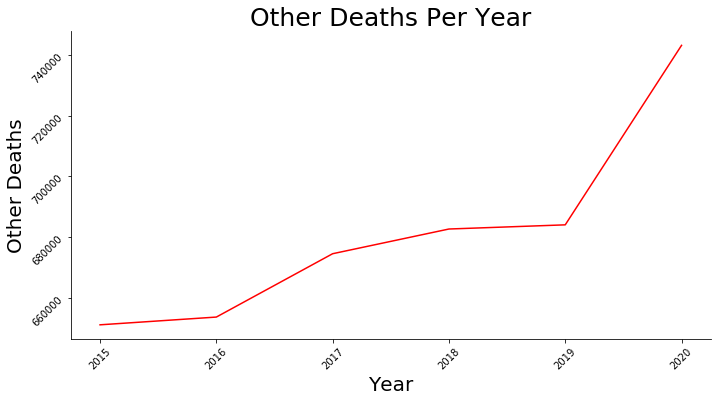

In [14]:
data_circulatory = pd.DataFrame([df_deathsCausePerYear['Year'], df_deathsCausePerYear['Circulatory']])
data_circulatory = data_circulatory.transpose().set_index('Year')
display(data_circulatory)
# Draw Plot
sns.relplot(x=data_circulatory.index, y='Circulatory', kind='line', height=5, aspect=2, color='gold', data=data_circulatory)
plt.title("Circulatory Deaths Per Year", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Circulatory Deaths", size=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

data_malignant = pd.DataFrame([df_deathsCausePerYear['Year'], df_deathsCausePerYear['Malignant']])
data_malignant = data_malignant.transpose().set_index('Year')
display(data_malignant)
# Draw Plot
sns.relplot(x=data_malignant.index, y='Malignant', kind = 'line', height=5, aspect=2, color='yellowgreen', data=data_malignant)
plt.title("Malignant Deaths Per Year", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Malignant Deaths", size=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

data_respiratory = pd.DataFrame([df_deathsCausePerYear['Year'], df_deathsCausePerYear['Respiratory']])
data_respiratory = data_respiratory.transpose().set_index('Year')
display(data_respiratory)
# Draw Plot
sns.relplot(x=data_respiratory.index, y='Respiratory', kind = 'line', height=5, aspect=2, color='orange', data=data_respiratory)
plt.title("Respiratory Deaths Per Year", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Respiratory Deaths", size=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

data_alzheimer = pd.DataFrame([df_deathsCausePerYear['Year'], df_deathsCausePerYear['Alzheimer']])
data_alzheimer = data_alzheimer.transpose().set_index('Year')
display(data_alzheimer)
# Draw Plot
sns.relplot(x=data_alzheimer.index, y='Alzheimer', kind = 'line', height=5, aspect=2, color='lightskyblue', data=data_alzheimer)
plt.title("Alzheimer Deaths Per Year", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Alzheimer Deaths", size=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

data_other = pd.DataFrame([df_deathsCausePerYear['Year'], df_deathsCausePerYear['Other']])
data_other = data_other.transpose().set_index('Year')
display(data_other)
# Draw Plot
sns.relplot(x=data_other.index, y='Other', kind = 'line', height=5, aspect=2, color='red', data=data_other)
plt.title("Other Deaths Per Year", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Other Deaths", size=20)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


### Deaths by jurisdiction

In [25]:
jurisdiction_deaths = data.copy()

index_to_drop = jurisdiction_deaths[(jurisdiction_deaths['State/territory'] == 'United States')].index

jurisdiction_deaths.drop(index_to_drop, inplace = True)
jurisdiction_deaths.head()


,State/territory,StateAbbreviation,Year,CauseGroup,NumberOfDeaths
0,Alabama,AL,2015,Alzheimer disease and dementia,120
1,Alabama,AL,2015,Alzheimer disease and dementia,120
2,Alabama,AL,2016,Alzheimer disease and dementia,76
3,Alabama,AL,2016,Alzheimer disease and dementia,76
4,Alabama,AL,2017,Alzheimer disease and dementia,96


### Total deaths by year and jurisdiction

In [26]:
yearJurisdiction_df = jurisdiction_deaths.groupby(['Year', 'State/territory']).sum()
yearJurisdiction_df


NumberOfDeaths
Year State/territory                
2015 Alabama                   77032
     Alaska                     2254
     Arizona                   79724
     Arkansas                  47900
     California               411494
...                              ...
2020 Virginia                 113637
     Washington                87051
     West Virginia             29333
     Wisconsin                 84521
     Wyoming                    3360

[318 rows x 1 columns]

### Total deaths by jurisdiction

In [27]:
jurisdiction_deaths = jurisdiction_deaths.groupby('State/territory', as_index=False).sum()
jurisdiction_deaths.drop('Year', axis = 1, inplace = True)
jurisdiction_deaths
jurisdiction_deaths.head()

,State/territory,NumberOfDeaths
0,Alabama,492182
1,Alaska,13654
2,Arizona,518901
3,Arkansas,296365
4,California,2548245


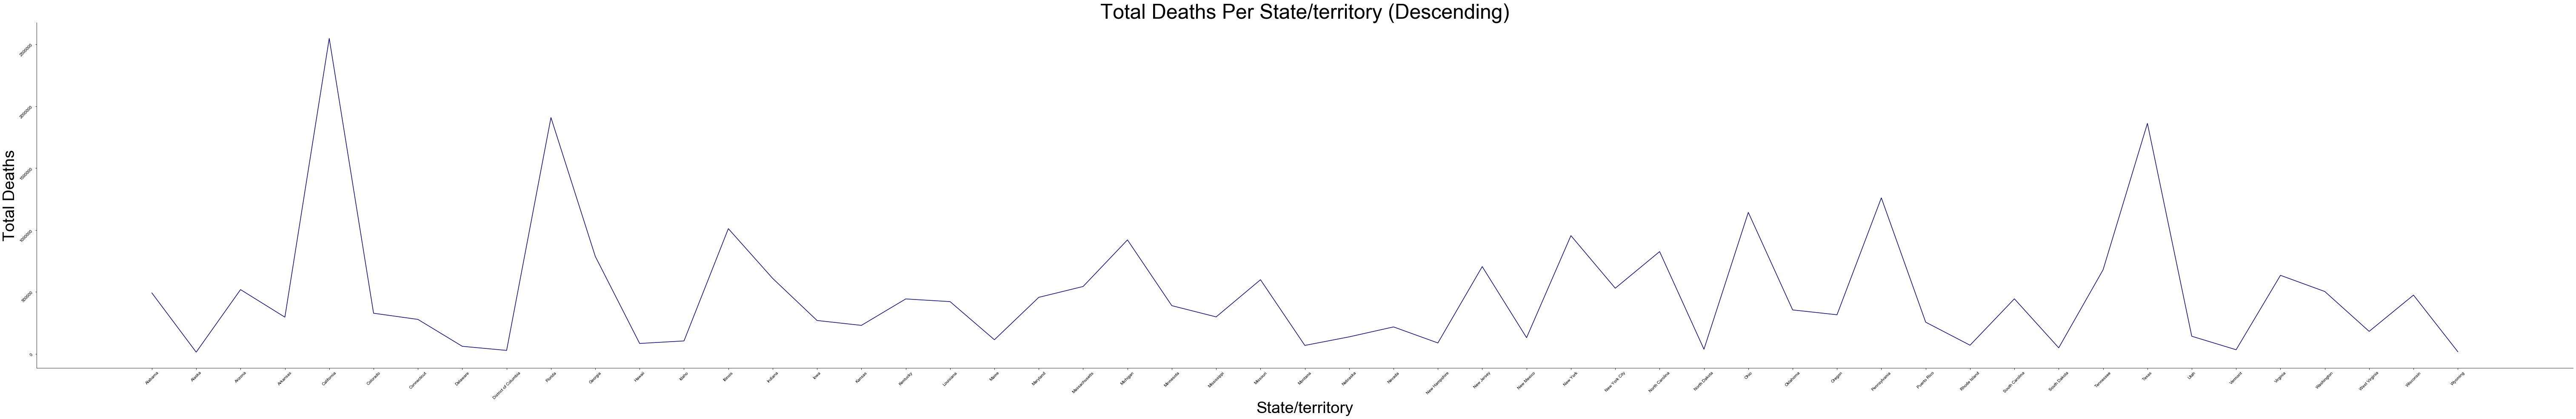

In [28]:
sns.relplot(x='State/territory', y='NumberOfDeaths', kind = 'line', height=12, aspect=7, color='darkblue', data=jurisdiction_deaths)
sns.set(font_scale = 3)
plt.title("Total Deaths Per State/territory (Descending)", size=48)
plt.xlabel("State/territory", size=38)
plt.ylabel("Total Deaths", size=38)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

### Total deaths by jurisdiction sorted from most to least

In [29]:
jurisdiction_deaths_sorted = jurisdiction_deaths.sort_values('NumberOfDeaths', ascending=False)
jurisdiction_deaths_sorted.head(10)

,State/territory,NumberOfDeaths
4,California,2548245
9,Florida,1908728
45,Texas,1861608
39,Pennsylvania,1259968
36,Ohio,1142658
13,Illinois,1011281
32,New York,954933
22,Michigan,920491
34,North Carolina,826074
10,Georgia,786982


### 2020 deaths by jurisdiction sorted from most to least

In [55]:
jurisdiction_deaths2020_sorted = yearJurisdiction_df.copy()
jurisdiction_deaths2020_sorted = jurisdiction_deaths2020_sorted.loc[(2020)].sort_values('NumberOfDeaths', ascending=False)
jurisdiction_deaths2020_sorted.head(10)

,NumberOfDeaths
State/territory,
California,449439
Florida,342518
Texas,335766
Pennsylvania,214464
Ohio,198922
Illinois,178559
Michigan,164261
New York,164201
Georgia,142512


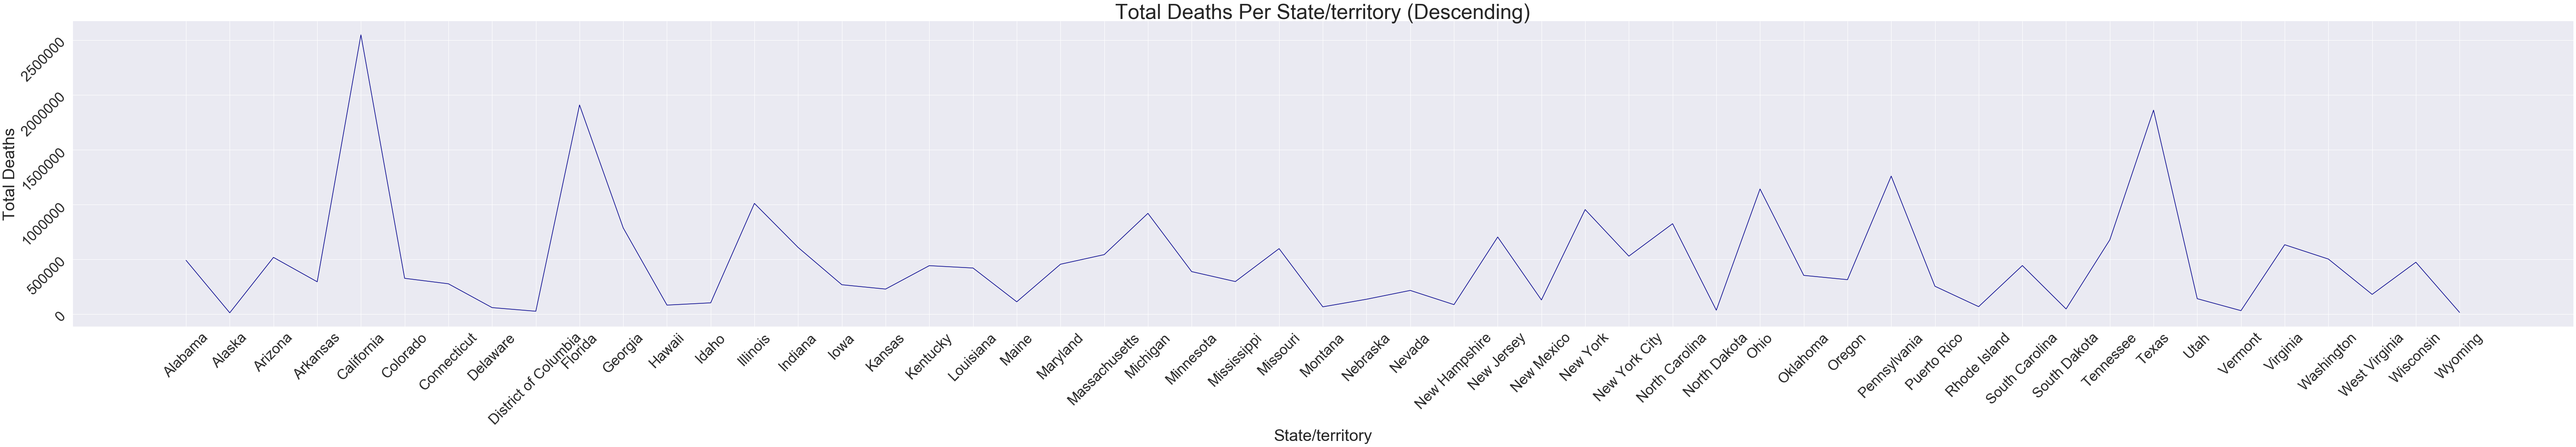

In [52]:
sns.relplot(x='State/territory', y='NumberOfDeaths', kind = 'line', height=12, aspect=7, color='darkblue', data=jurisdiction_deaths_sorted)
sns.set(font_scale = 3)
plt.title("Total Deaths Per State/territory (Descending)", size=48)
plt.xlabel("State/territory", size=38)
plt.ylabel("Total Deaths", size=38)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

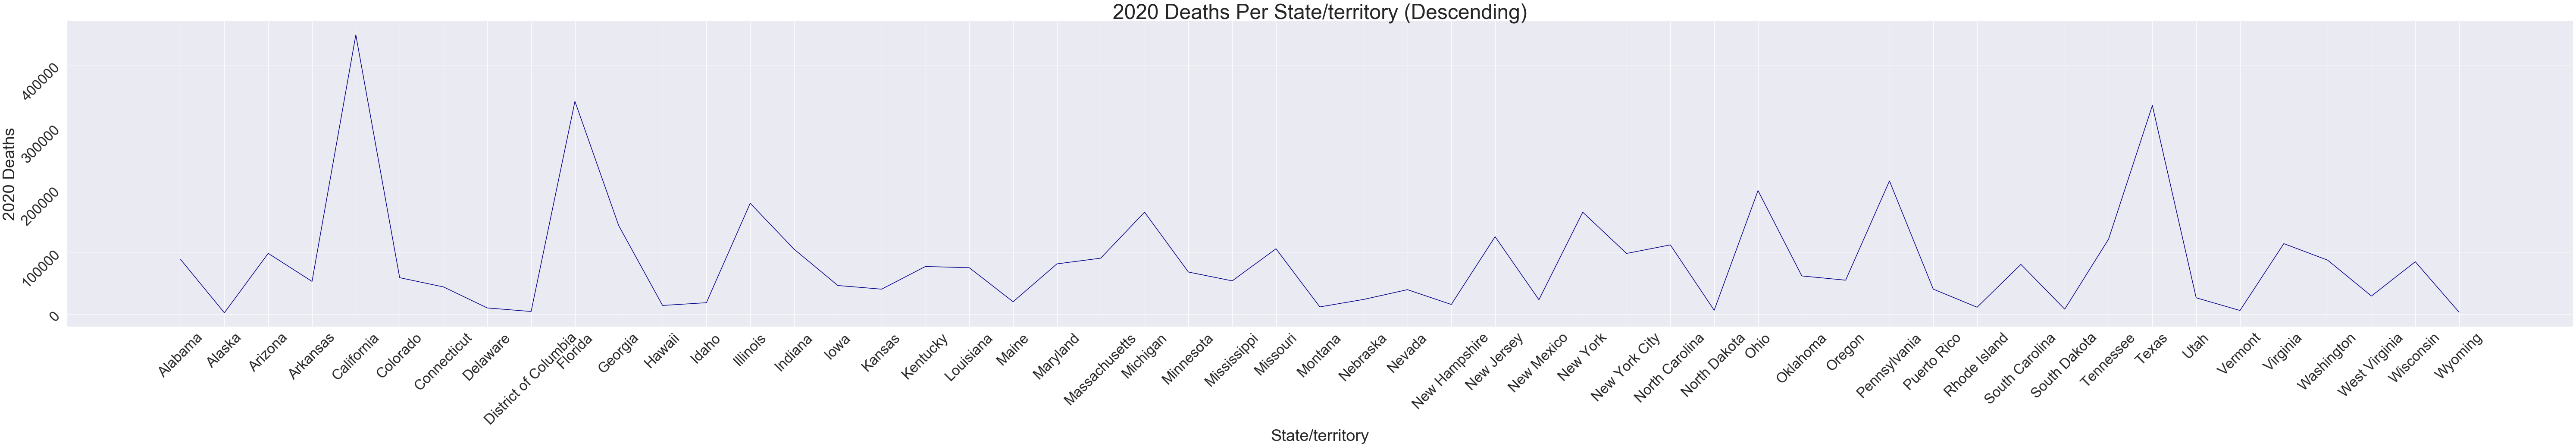

In [59]:
jurisdiction_deaths2020_sorted = jurisdiction_deaths2020_sorted.reset_index()
sns.relplot(x='State/territory', y='NumberOfDeaths', kind = 'line', height=12, aspect=7, color='darkblue', data=jurisdiction_deaths2020_sorted)
sns.set(font_scale = 3)
plt.title("2020 Deaths Per State/territory (Descending)", size=48)
plt.xlabel("State/territory", size=38)
plt.ylabel("2020 Deaths", size=38)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# Adding Population Data

One thing that we should keep in mind is that different states have different populations, and thus different death rates. California will have more deaths than Idaho simply because it has more people. To correct for this, we can figure out the Deaths Per Capita, or the proportion of deaths for the entire population.

However, our data doesn't have any population estimates so we will need to get that data ourselves. Thankfully, we can use the US Census to find the populations, or at least population estimates, for each state for each year. The data can be found [here](https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html#par_textimage). Note that these are population estimates. The Census was conducted in 2010, and each year's population was estimated from that data.

We should also note that this dataset contains much more information than just population estimates, such as counts for deaths, migration and natural increase. We are only interesting in the population estimates, so we can remove the rest of the variables.

In [122]:
# Load in the US Census Population data for 2010-2019
df_pop = pd.read_csv("nst-est2019-alldata.csv")
df_pop_clean = df_pop.copy()

# This dataset contains other information as well, like Deaths, Migration and Residuals.
# We only care about the population, so we can drop the rest
df_pop_clean = df_pop_clean[["NAME", "POPESTIMATE2010", "POPESTIMATE2011", "POPESTIMATE2012", "POPESTIMATE2013", 
                             "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017",
                             "POPESTIMATE2018", "POPESTIMATE2019"]]
df_pop_clean.columns = ["Name", "pop2010", "pop2011", "pop2012", "pop2013", "pop2014", "pop2015",
                        "pop2016", "pop2017", "pop2018", "pop2019"]
df_pop_clean

,Name,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,pop2018,pop2019
0,United States,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523
1,Northeast Region,55380134,55604223,55775216,55901806,56006011,56034684,56042330,56059240,56046620,55982803
2,Midwest Region,66974416,67157800,67336743,67560379,67745167,67860583,67987540,68126781,68236628,68329004
3,South Region,114866680,116006522,117241208,118364400,119624037,120997341,122351760,123542189,124569433,125580448
4,West Region,72100436,72788329,73477823,74167130,74925793,75742555,76559681,77257329,77834820,78347268
5,Alabama,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
6,Alaska,713910,722128,730443,737068,736283,737498,741456,739700,735139,731545
7,Arizona,6407172,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717
8,Arkansas,2921964,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804
9,California,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223


As always, we should check for missing and strange values, and correct them if possible. So let's do that for the population data as well.

In [123]:
# Check for missing values
df_pop_clean.isnull().sum()

Name       0
pop2010    0
pop2011    0
pop2012    0
pop2013    0
pop2014    0
pop2015    0
pop2016    0
pop2017    0
pop2018    0
pop2019    0
dtype: int64

In [124]:
# Check for strange values
df_pop_clean.describe()

,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,pop2018,pop2019
count,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01,5.700000e+01
mean,1.634538e+07,1.646227e+07,1.658118e+07,1.669428e+07,1.681470e+07,1.693647e+07,1.705668e+07,1.716284e+07,1.725010e+07,1.733179e+07
std,4.444586e+07,4.477654e+07,4.511484e+07,4.543594e+07,4.578079e+07,4.613239e+07,4.647905e+07,4.678579e+07,4.704177e+07,4.727622e+07
min,5.644870e+05,5.672990e+05,5.763050e+05,5.821220e+05,5.825310e+05,5.856130e+05,5.842150e+05,5.789310e+05,5.776010e+05,5.787590e+05
25%,1.854239e+06,1.856301e+06,1.856872e+06,1.865279e+06,1.879321e+06,1.891277e+06,1.905616e+06,1.915947e+06,1.925614e+06,1.934408e+06
50%,4.635649e+06,4.671994e+06,4.717354e+06,4.764080e+06,4.823617e+06,4.852347e+06,4.863525e+06,4.874486e+06,4.887681e+06,4.903185e+06
75%,9.574323e+06,9.657592e+06,9.749476e+06,9.843336e+06,9.929848e+06,9.931715e+06,9.950571e+06,9.973114e+06,9.984072e+06,9.986857e+06
max,3.093217e+08,3.115569e+08,3.138310e+08,3.159937e+08,3.183010e+08,3.206352e+08,3.229413e+08,3.249855e+08,3.266875e+08,3.282395e+08


From our analysis, and a quick visual inspection of the data, it appears that all the values are accounted for and correct. Now we just need to combine this data with our death rates data.

But our populations only go through 2019. We also want to include 2020 population data. At time of writing this, the 2020 census data has not been released yet so we will still need to work with estimates. The best estimates I found were from [here](https://en.wikipedia.org/wiki/2020_United_States_census). So we need to do some webscrapping to get these data.

In [125]:
# URL of 2020 census estimates
url = "https://en.wikipedia.org/wiki/2020_United_States_census"
# Use pandas to scrape the tables from the wikipedia page
tables = pd.read_html(url)

In [126]:
# Gather and clean up the estimated 2020 populations
df_pop_2020 = tables[2].copy()
# We don't need information on 2010 populations or percent change since then. 
# Drop all columns that aren't the state and the 2020 estimated pop.
df_pop_2020 = df_pop_2020[["State or territory", "July 1, 2020 estimated population[78]"]]
# Rename columns to be more usable
df_pop_2020.columns = ["State", "pop2020"]
# Add pop2020 as column to overall population dataframe
df_pop_full = df_pop_clean.copy()
df_pop_full = df_pop_full.merge(df_pop_2020, how="left", left_on="Name", right_on="State")
# Drop added State column
df_pop_full.drop("State", axis=1, inplace=True)
df_pop_full.head(6)

,Name,pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016,pop2017,pop2018,pop2019,pop2020
0,United States,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523,329484123.0
1,Northeast Region,55380134,55604223,55775216,55901806,56006011,56034684,56042330,56059240,56046620,55982803,NaN
2,Midwest Region,66974416,67157800,67336743,67560379,67745167,67860583,67987540,68126781,68236628,68329004,NaN
3,South Region,114866680,116006522,117241208,118364400,119624037,120997341,122351760,123542189,124569433,125580448,NaN
4,West Region,72100436,72788329,73477823,74167130,74925793,75742555,76559681,77257329,77834820,78347268,NaN
5,Alabama,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185,4921532.0


Now we're going to merge our population and death dataframes. However, before we start, we should note that they are formatted differently. The population dataframe is per state, with each year as a new column. The deaths dataframe is per state and per year, with a single value for the deaths. 

Therefor, we're going to have to reformat our datasets. Let's transform our population data to match the form of the death counts dataframe.

In [128]:
df_deaths_per_state = yearJurisdiction_df.copy().reset_index()

# Change the dataframe to be per State, per year.
df_pop_per_state = pd.melt(df_pop_full, id_vars=["Name"])
# Now need to change the format of year from 'pop20XX' -> '20XX'
df_pop_per_state["variable"] = df_pop_per_state["variable"].apply(lambda x: re.sub(r"^pop", "", x))
# Rename the columns to be more understandable
df_pop_per_state.columns = ["Name", "Year", "Population"]
# Change the type of year to an int64 to match the deaths dataframe
df_pop_per_state["Year"] = df_pop_per_state["Year"].astype("int64")

# Merge the death and population dataframes
df_full = df_deaths_per_state.merge(df_pop_per_state, how="left", left_on=["Year", "State/territory"], right_on=["Year", "Name"])
df_full

,Year,State/territory,NumberOfDeaths,Name,Population
0,2015,Alabama,77032,Alabama,4852347.0
1,2015,Alaska,2254,Alaska,737498.0
2,2015,Arizona,79724,Arizona,6829676.0
3,2015,Arkansas,47900,Arkansas,2978048.0
4,2015,California,411494,California,38918045.0
...,...,...,...,...,...
313,2020,Virginia,113637,Virginia,8590563.0
314,2020,Washington,87051,Washington,7693612.0
315,2020,West Virginia,29333,West Virginia,1784787.0
316,2020,Wisconsin,84521,Wisconsin,5832655.0


Now we have Deaths and Population per state per year. It's an easily calculation to find the Deaths per Capita, i.e. proportion of deaths per year per state.

In [130]:
df_full["DeathsPerCapita"] = df_full["NumberOfDeaths"] / df_full["Population"]
df_full

,Year,State/territory,NumberOfDeaths,Name,Population,DeathsPerCapita
0,2015,Alabama,77032,Alabama,4852347.0,0.015875
1,2015,Alaska,2254,Alaska,737498.0,0.003056
2,2015,Arizona,79724,Arizona,6829676.0,0.011673
3,2015,Arkansas,47900,Arkansas,2978048.0,0.016084
4,2015,California,411494,California,38918045.0,0.010573
...,...,...,...,...,...,...
313,2020,Virginia,113637,Virginia,8590563.0,0.013228
314,2020,Washington,87051,Washington,7693612.0,0.011315
315,2020,West Virginia,29333,West Virginia,1784787.0,0.016435
316,2020,Wisconsin,84521,Wisconsin,5832655.0,0.014491


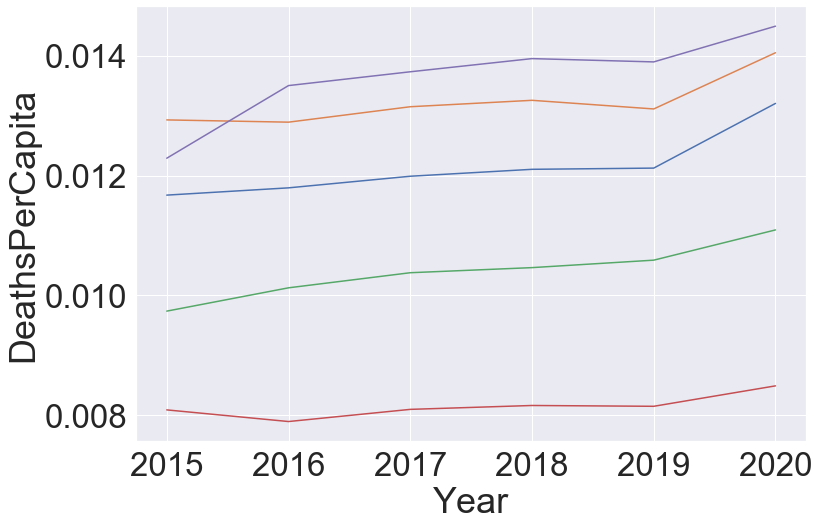

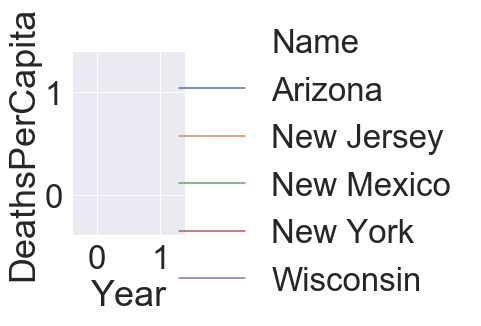

In [169]:
# Let's make a quick visualization of DeathsPerCapita.
# Pulling a few random states, let's look at the change over time
np.random.seed(1)
random_states = np.random.choice(df_full["Name"].unique(), 5, replace=False)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.relplot(x="Year", y="DeathsPerCapita", hue="Name", kind="line", data=df_full.loc[df_full["Name"].isin(random_states)], ax=ax)

In [170]:
# Save the final dataset as a CSV file
df_full.to_csv("State_Deaths_and_Pops.csv")

## Webscraping for State Lockdowns

We want to compare how different lockdown levels affected the overall death rates of the jurisdictions. So we're going to need information on lockdown levels. Thankfully, [Wikipedia](https://en.wikipedia.org/wiki/U.S._state_and_local_government_responses_to_the_COVID-19_pandemic) has a very good resource for lockdown information for each state. We can use webscrapping to gather the information from the tables on this page to use for our goals.

In [ ]:
# Cell to request and load the data
url = "https://en.wikipedia.org/wiki/U.S._state_and_local_government_responses_to_the_COVID-19_pandemic"

# Use pandas to webscrape wiki tables
tables = pd.read_html(url)

There are two tables on this page that are worth using. 

* The first contains information on each state's level of lockdown. What activites where restricted, whether masks are required when outdoors, things like that. We can use this to do some feature engineering on the severity of the lockdown for each state.
* The second table is the date range for states that gave "Stay at Home" orders. We can use these ranges to compare the death rates of states that did and didn't issue stay at home orders.

In [ ]:
# Cell to extract and clean the table of restrictions

# Get the main table from the list
df_restrictions = tables[1]

# The original table has stacked column names, so we need to change that to a list
# Don't care about supertitle, so can just take subcolumn name.
new_columns = [col[1] for col in df_restrictions.columns]
df_restrictions.columns = new_columns

# Fix the column names that contain source numbers
# Also shorten names that can be shortened
df_restrictions.rename(columns={"Face coverings required in public[5]": "Masks required in public", \
                                "Bars & sit-down restaurants": "Restaurants"}, inplace=True)

# Remove columns: 
# "State/territory.1": extra state column because same as "State/territory" column
# "Stay at home ordered": because is contained in second table, in better format
# "Sources": Doesn't provide any useable information
df_restrictions.drop(["State/territory.1", "Stay at home ordered", "Sources"], axis=1, inplace=True)
df_restrictions

# Change datatypes of date columns to datetime
# Datetime only recognizes 0 padded numbers, so need to add 0 to strings
# Also, add the year 2020 to the string
def pad_emergency_dates(date):
    date = re.sub(r" ([0-9]{1}$)", r" 0\1", date)
    return date + ", 2020"

emergency_dates = df_restrictions["State of emergency declared"].apply(pad_emergency_dates)
df_restrictions["State of emergency declared"] = pd.to_datetime(emergency_dates, format="%B %d, %Y")

# Change datatypes of Yes/No columns to categorical
df_restrictions["Masks required in public"] = df_restrictions["Masks required in public"].astype("category")
df_restrictions["Gatherings banned"] = df_restrictions["Gatherings banned"].astype("category")
df_restrictions["Out-of-state travel restrictions"] = df_restrictions["Out-of-state travel restrictions"].astype("category")
df_restrictions["Schools"] = df_restrictions["Schools"].astype("category")
df_restrictions["Daycares"] = df_restrictions["Daycares"].astype("category")
df_restrictions["Restaurants"] = df_restrictions["Restaurants"].astype("category")
df_restrictions["Non-essential retail"] = df_restrictions["Non-essential retail"].astype("category")

In [ ]:
# Cell to extract and clean the dates of lockdowns

# Get the table of lockdown ending dates
df_lockdown_dates = tables[2]

# Fix the Date for Wisconsin by removing source numbers
df_lockdown_dates["Date lifted"][22] = re.sub(r"\[[0-9]+\]+", "", df_lockdown_dates["Date lifted"][22])

# Change types of date columns in lockdown dataframe to datetime
df_lockdown_dates["Date enacted"] = pd.to_datetime(df_lockdown_dates["Date enacted"])
df_lockdown_dates["Date lifted"] = pd.to_datetime(df_lockdown_dates["Date lifted"])

In [ ]:
# Cell to join the two tables

# Merge the two tables on by State
df = df_restrictions.merge(df_lockdown_dates, left_on="State/territory", right_on="State", how="left")
# Drop extra State column
df.drop(["State"], axis=1, inplace=True)
# Rename added columns
df.rename(columns={"Date enacated": "Lockdown enacted date", "Date lifted": "Lockdown lifted date"}, inplace=True)
df.head()

In [ ]:
# Save the dataframe as a pickle file
df.to_pickle("State_Lockdowns.pkl")

## Combine dataframes

In [ ]:
stateDeaths_2020 = yearJurisdiction_df.loc[(2020)]

# Drop rows from df that the state/territory isn't in stateDeaths_2020
df.drop(df[df['State/territory'] == 'American Samoa'].index, inplace = True)
df.drop(df[df['State/territory'] == 'Guam'].index, inplace = True)
df.drop(df[df['State/territory'] == 'N. Mariana Islands'].index, inplace = True)

# death count columns to df
df['2020 Deaths'] = np.array(stateDeaths_2020['NumberOfDeaths'])
df['Total Deaths'] = np.array(jurisdiction_deaths['NumberOfDeaths'])
print(df.shape)
print(jurisdiction_deaths2020_sorted.shape)

In [ ]:
df_mostTotalDeaths = df.sort_values('Total Deaths', ascending=False).head(10)

df_mostTotalDeaths

In [ ]:
df_mostDeaths2020 = df.sort_values('2020 Deaths', ascending=False).head(10)

df_mostDeaths2020

In [ ]:
sns.catplot(x='State/territory', y='2020 Deaths', hue='Masks required in public', kind='bar', height=10, aspect=3, data=df_mostDeaths2020)
plt.title('Top State/territory Deaths Mask Mandate 2020', size=60)
plt.xlabel('State/territory', size=50)
plt.ylabel('2020 Deaths', size=50)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

From the chart above of the top 10 states/territories with the most deaths in 2020, mask mandates did not matter. The top state (California) required masks in public and the second top state did not require masks in public.

In [ ]:
sns.catplot(x='State/territory', y='2020 Deaths', hue='Gatherings banned', kind='bar', height=10, aspect=3, data=df_mostDeaths2020)
plt.title('Top State/Territory Deaths Gatherings Banned', size=60)
plt.xlabel('State/Territory', size=50)
plt.ylabel('2020 Deaths', size=50)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()